# MIE1628S 2025 A2: APACHE SPARK
**John(Litao) Zhou -1006013092**

**2. Salary Aggregation with Statistical Analysis [Marks: 10]**

Analyze the salary.txt file to compute total salaries per department. Expand your analysis
to investigate trends or discrepancies in salary distributions.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
salaryRDD = spark.sparkContext.textFile("/FileStore/tables/salary.txt")
salaryRDD.collect()

Out[2]: ['Sales 9136',
 'Research 13391',
 'Developer 22220',
 'QA 31888',
 'Marketing 22215',
 'Sales 45567',
 'Research 4023',
 'Developer 7262',
 'QA 5243',
 'Marketing 11425',
 'Sales 11956',
 'Research 24149',
 'Developer 18258',
 'QA 22962',
 'Marketing 28960',
 'Sales 8766',
 'Research 18343',
 'Developer 13686',
 'QA 27626',
 'Marketing 32430',
 'Sales 761',
 'Research 22690',
 'Developer 11703',
 'QA 591',
 'Marketing 15249',
 'Sales 15831',
 'Research 28373',
 'Developer 31034',
 'QA 27821',
 'Marketing 25192',
 'Sales 12640',
 'Research 15100',
 'Developer 2781',
 'QA 17773',
 'Marketing 9047',
 'Sales 20425',
 'Research 19555',
 'Developer 10498',
 'QA 18714',
 'Marketing 1209',
 'Sales 16369',
 'Research 3513',
 'Developer 3362',
 'QA 27723',
 'Marketing 25341',
 'Sales 28399',
 'Research 15762',
 'Developer 23792',
 'QA 13328',
 'Marketing 4390',
 'Sales 32523',
 'Research 16805',
 'Developer 18811',
 'QA 12468',
 'Marketing 7741',
 'Sales 23584',
 'Research 16119',
 'Dev

In [0]:
#parse dataset
arrayRDD = salaryRDD.map(lambda x: x.split())
arrayRDD.collect()

Out[3]: [['Sales', '9136'],
 ['Research', '13391'],
 ['Developer', '22220'],
 ['QA', '31888'],
 ['Marketing', '22215'],
 ['Sales', '45567'],
 ['Research', '4023'],
 ['Developer', '7262'],
 ['QA', '5243'],
 ['Marketing', '11425'],
 ['Sales', '11956'],
 ['Research', '24149'],
 ['Developer', '18258'],
 ['QA', '22962'],
 ['Marketing', '28960'],
 ['Sales', '8766'],
 ['Research', '18343'],
 ['Developer', '13686'],
 ['QA', '27626'],
 ['Marketing', '32430'],
 ['Sales', '761'],
 ['Research', '22690'],
 ['Developer', '11703'],
 ['QA', '591'],
 ['Marketing', '15249'],
 ['Sales', '15831'],
 ['Research', '28373'],
 ['Developer', '31034'],
 ['QA', '27821'],
 ['Marketing', '25192'],
 ['Sales', '12640'],
 ['Research', '15100'],
 ['Developer', '2781'],
 ['QA', '17773'],
 ['Marketing', '9047'],
 ['Sales', '20425'],
 ['Research', '19555'],
 ['Developer', '10498'],
 ['QA', '18714'],
 ['Marketing', '1209'],
 ['Sales', '16369'],
 ['Research', '3513'],
 ['Developer', '3362'],
 ['QA', '27723'],
 ['Marketing',

In [0]:
keyvalRDD = arrayRDD.map(lambda x: (x[0],int(x[1])))
keyvalRDD.collect()

Out[4]: [('Sales', 9136),
 ('Research', 13391),
 ('Developer', 22220),
 ('QA', 31888),
 ('Marketing', 22215),
 ('Sales', 45567),
 ('Research', 4023),
 ('Developer', 7262),
 ('QA', 5243),
 ('Marketing', 11425),
 ('Sales', 11956),
 ('Research', 24149),
 ('Developer', 18258),
 ('QA', 22962),
 ('Marketing', 28960),
 ('Sales', 8766),
 ('Research', 18343),
 ('Developer', 13686),
 ('QA', 27626),
 ('Marketing', 32430),
 ('Sales', 761),
 ('Research', 22690),
 ('Developer', 11703),
 ('QA', 591),
 ('Marketing', 15249),
 ('Sales', 15831),
 ('Research', 28373),
 ('Developer', 31034),
 ('QA', 27821),
 ('Marketing', 25192),
 ('Sales', 12640),
 ('Research', 15100),
 ('Developer', 2781),
 ('QA', 17773),
 ('Marketing', 9047),
 ('Sales', 20425),
 ('Research', 19555),
 ('Developer', 10498),
 ('QA', 18714),
 ('Marketing', 1209),
 ('Sales', 16369),
 ('Research', 3513),
 ('Developer', 3362),
 ('QA', 27723),
 ('Marketing', 25341),
 ('Sales', 28399),
 ('Research', 15762),
 ('Developer', 23792),
 ('QA', 13328),

In [0]:
sumRDD = keyvalRDD.reduceByKey(lambda x,y: x + y)
results = sumRDD.collect()
for dept, sumsalary in results:
    print(f'{dept} department total salary: {sumsalary}')

Sales department total salary: 3488491
Research department total salary: 3328284
Developer department total salary: 3221394
QA department total salary: 3360624
Marketing department total salary: 3158450


In [0]:
# Collect key-va pairs
raw_data = keyvalRDD.collect()

# Convert to pandas DataFrame
df = pd.DataFrame(raw_data, columns=["Department", "Salary"])

In [0]:
# Group salary based department
groupedRDD = keyvalRDD.groupByKey().mapValues(list)

#calculate stats
statsRDD = groupedRDD.mapValues(lambda salaries: {
    'count': len(salaries),
    'sum': sum(salaries),
    'mean': np.mean(salaries),
    'median': np.median(salaries),
    'stddev': np.std(salaries)
})

results = statsRDD.collect()
for dept, stats in results:
    print(f"{dept}")
    print(f"Count: {stats['count']}")
    print(f"Sum: {stats['sum']}")
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Median: {stats['median']:.2f}")
    print(f"Standard Deviation: {stats['stddev']:.2f}")
    print("---------------")

Sales
Count: 201
Sum: 3488491
Mean: 17355.68
Median: 16698.00
Standard Deviation: 10509.41
---------------
Research
Count: 200
Sum: 3328284
Mean: 16641.42
Median: 17188.00
Standard Deviation: 9166.54
---------------
Developer
Count: 200
Sum: 3221394
Mean: 16106.97
Median: 15231.50
Standard Deviation: 9115.28
---------------
QA
Count: 200
Sum: 3360624
Mean: 16803.12
Median: 17737.50
Standard Deviation: 9830.17
---------------
Marketing
Count: 200
Sum: 3158450
Mean: 15792.25
Median: 13939.00
Standard Deviation: 9977.95
---------------


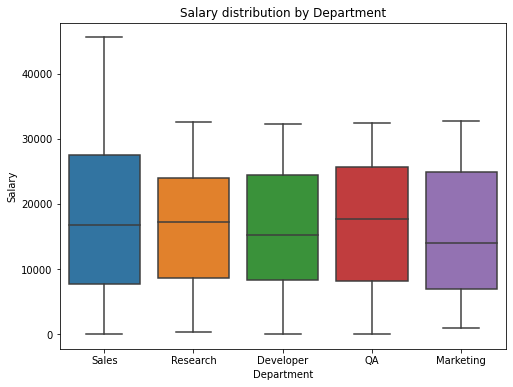

In [0]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary distribution by Department')
plt.xticks()
plt.show()

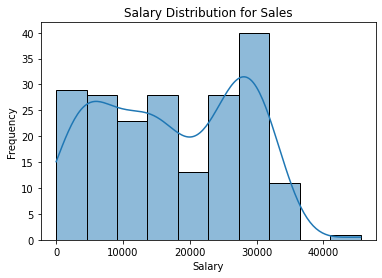

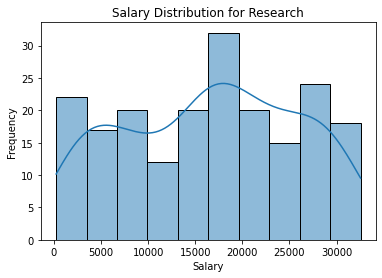

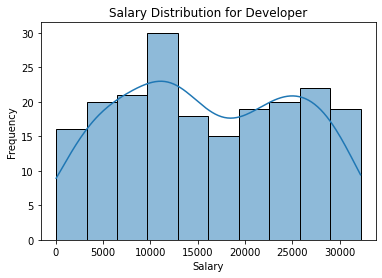

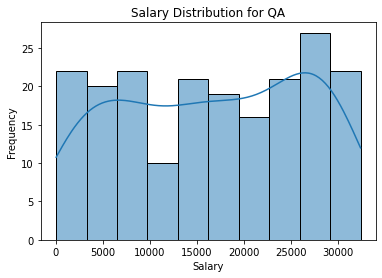

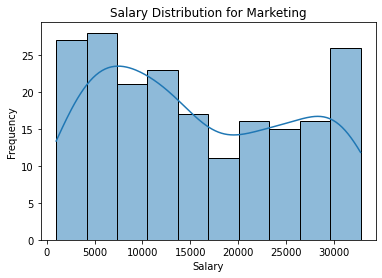

In [0]:
# Loop through all departments
for dept in df['Department'].unique():
    plt.figure(figsize=(6, 4))
    sns.histplot(df[df['Department'] == dept]['Salary'], kde=True, bins=10)
    plt.title(f'Salary Distribution for {dept}')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.show()